### Última aula - Analise exploratoria - Fernanda Santos
<br>
####Digital Inovation One

In [3]:
# Importando Bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [7]:
# Upload do arquivo, via pasta, quando sair da tela, tem que importar o arquivo novamente
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [11]:
# Criando o Data Frame
df = pd.read_excel('AdventureWorks.xlsx')

In [12]:
# Vizualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [14]:
# Mostrar tamanho de linhas e colunas
df.shape

(904, 16)

In [15]:
# Verificando o tipo de dos dados

df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [33]:
# Verificando valores ausente

df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
tempo_envio       0
dtype: int64

###Como primeira Analise, 
### vamos descobrir o Faturamento, custo e Lucro total dessa amostra

In [18]:
# Verificando a receita/faturamento total

df['Valor Venda'].sum()

5984606.1426

In [21]:
# Verificando o valor do custo total, por linha
# E criando a coluna de custo

df['custo'] = df['Custo Unitário'].mul (df['Quantidade'])

In [22]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [23]:
# Verificando o valor do custo total, pela coluna
# o dois no final é para retornar duas casas após o ponto
round(df['custo'].sum(), 2)

2486783.05

In [26]:
# com a receita e o custo total, pode-se encontrar o lucro
# Criar uma nova coluna, de lucro (Venda - Custo)
df['lucro'] = df['Valor Venda'] - df['custo']


In [27]:
df.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [28]:
# Verificando o valor do Lucro Total, pela coluna
# o dois no final é para retornar duas casas após o ponto
round(df['lucro'].sum(), 2)

3497823.09

###Como segunda Analise, 
### vamos descobrir o tempo de envio dos produtos, verificando a coluna data envio (menos) - data venda.
####Vamos criar uma nova coluna

In [29]:
df['tempo_envio'] = df['Data Envio'] - df['Data Venda']

In [32]:
# Confirmar se a coluna foi criada
df.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5 days
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days


In [35]:
# media de tempo de envio, para usar o mean precisamos antes transformar o days da nova coluna para inteiro
df['tempo_envio'] = (df['Data Envio'] - df['Data Venda']).dt.days


In [37]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [39]:
# Verificando o tipo da coluna tempo_envio

df['tempo_envio'].dtype

dtype('int64')

In [40]:
# Agora com o tempo_envio como inteiro, conseguimos aplicar o mean
# Usaremos uma média por marca
df.groupby('Marca')['tempo_envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: tempo_envio, dtype: float64

In [45]:
# Buscamos agora um lucro, por ano e por marca
# .year é para retornar somente o ano da data
df.groupby([df['Data Venda'].dt.year, 'Marca'])['lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [44]:
# Na coluna de cima o retorno veio em float/notação cientifica, precisa estar melhor para vizualização
# para isso formatar o float, rodar a cedula e depois rodar novamente a de cima
pd.options.display.float_format = '{:20,.2f}'.format


In [46]:
# Usar o criterio reset_index, para organizar melhor a informação da cedula 45.
# para melhor vizualização

df.groupby([df['Data Venda'].dt.year, 'Marca'])['lucro'].sum().reset_index()

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


### Quais foram os produtos mais vendidos e suas respectivas quantidades, em ordem decrescente?

In [47]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

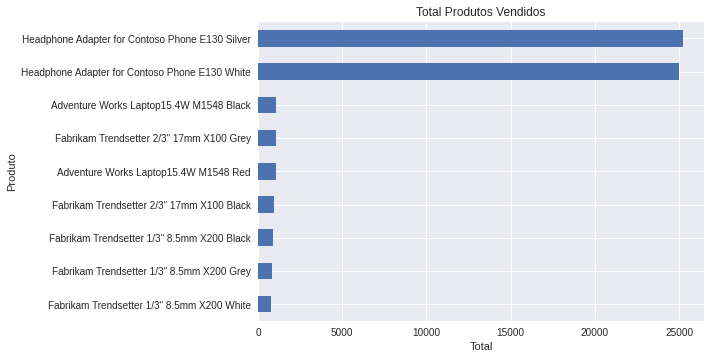

In [49]:
# Apresentando a informação acima em gráfico

df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(title='Total Produtos Vendidos') #grafico de barras horizontais
plt.xlabel ('Total')
plt.ylabel ('Produto');

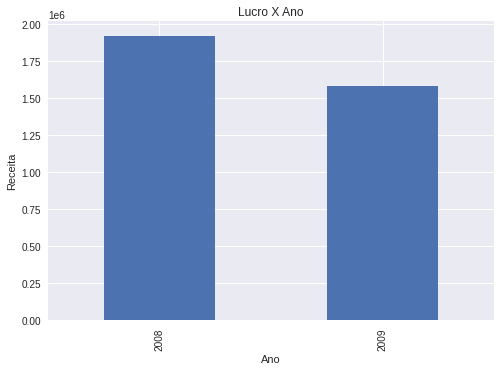

In [50]:
# Apresentando em grafico o lucro por ano

df.groupby(df['Data Venda'].dt.year)['lucro'].sum().plot.bar(title='Lucro X Ano') #grafico de barras verificais
plt.xlabel ('Ano')
plt.ylabel ('Receita');

In [51]:
# Valores do lucro nos dois anos

df.groupby(df['Data Venda'].dt.year)['lucro'].sum()


Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [52]:
# Selecionando apenas as vendas de 2009
# criar uma nova variavel df2009
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [58]:
# Selecionar somente as vendas de 2009
df_2009.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12


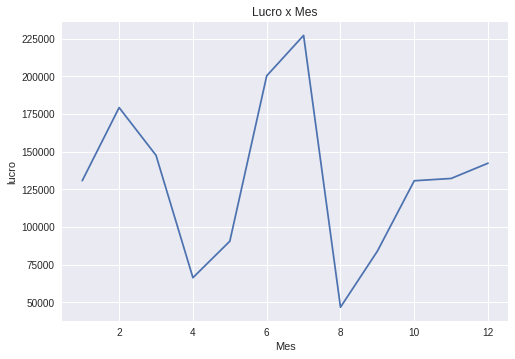

In [56]:
# Grafico de linhas, por mes de 2009.
df_2009.groupby(df_2009['Data Venda'].dt.month)['lucro'].sum().plot(title = 'Lucro x Mes') # grafico de linhas
plt.xlabel ('Mes')
plt.ylabel ('lucro');

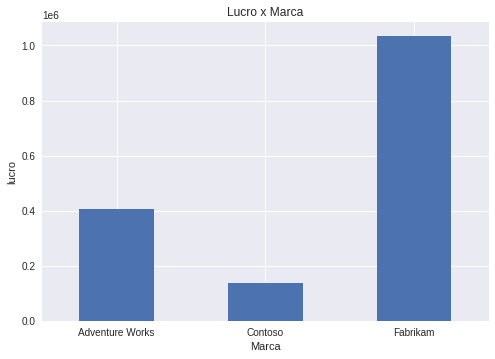

In [57]:
# Lucro por marca
df_2009.groupby('Marca')['lucro'].sum().plot.bar(title = 'Lucro x Marca') # grafico de linhas
plt.xlabel ('Marca')
plt.ylabel ('lucro');
plt.xticks(rotation = 'horizontal'); # a descrição do eixo X na horizontal e não na vertical como ele vem por padrão

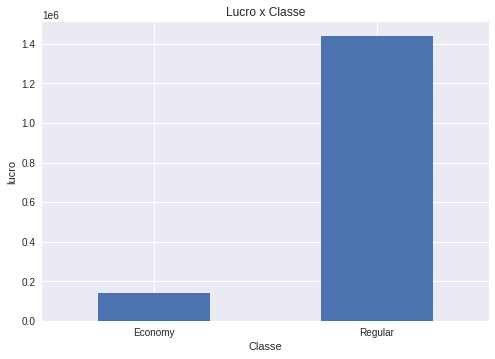

In [59]:
# Lucro por marca
df_2009.groupby('Classe')['lucro'].sum().plot.bar(title = 'Lucro x Classe') # grafico de linhas
plt.xlabel ('Classe')
plt.ylabel ('lucro');
plt.xticks(rotation = 'horizontal');

### Analises estatísticas e graficos ainda não utilizados.

In [61]:
#  dos dias de envio da entrega
df['tempo_envio'].min()

4

In [62]:
df['tempo_envio'].max()

20

In [63]:
# Com todos as descrições

# std - desvio padrao
# quartil e percentiil 25% e 75%
# 50% mediana
# 25% percentil dos menores dados
# Max 

df['tempo_envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: tempo_envio, dtype: float64

Em estatística, o termo **“outlier”** se refere a um ponto fora da curva. 
<br>
É um valor diferenciado e atípico, que se difere de todos os outros de uma mesma série. 
<br>
Assim ocorre também com um profissional outlier, ou seja, aquele que se destaca em meio aos concorrentes.
<br>
Nesse exemplo a entrega de 20 dias pode ter sido por uma greve da transportadora/correio.
<br>
O Outlier nesse exemplo é o 100% = 20

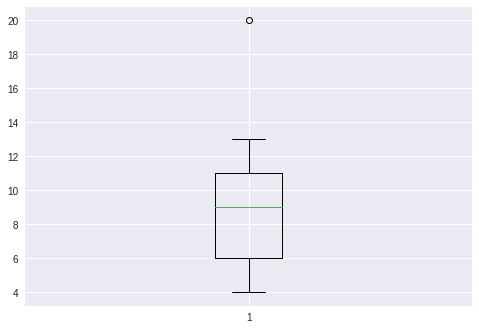

In [65]:
# O grafico de boxplot demonstra os limites acima
# ; ele não aparece a descrição
# O quadrado representa de 25% a 75%


plt.boxplot (df['tempo_envio']);

In [66]:
# é possivel buscar esse valor do outlier, 20
# retonrno a linha 0, primeira

df[df['tempo_envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [67]:
# é posivel salvar essa nota planilha em csv, com as novas colunas 

df.to_csv ('df_vendas_novo.csv', index=False)